# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rian Adi Saputro
- **Email:** razapoetra@gmail.com
- **ID Dicoding:** rianadis

## Menentukan Pertanyaan Bisnis

1. Dalam periode apa paling banyak terjadi transaksi?
2. Produk apa yang paling laris?
3. Berapa batas wajar freight value terhadap price?
4. Dimana paling banyak customer berasal?

## Import Semua Packages/Library yang Digunakan

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [87]:
# read orders data
orders_df = pd.read_csv('data/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [88]:
# read orders item data
order_items_df = pd.read_csv('data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [89]:
# read product data
products_df = pd.read_csv('data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [90]:
# read product category name data
product_translation_df = pd.read_csv('data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [91]:
# read customers data
customers_df = pd.read_csv('data/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Untuk memahami detil data product perlu gabungan dari dataset:
    - products dataset: product_id, product_category_name
    - product_category_name_translation: product_category_name dan product_category_name_english

- Untuk menjawab pertannyaan 1 dan 4 dibutuhkan gabungan data sebagai berikut:
    - orders dataset: order_id, customer_id, order_status, order_purchase_timestamp
    - customers dataset: customer_id, customer_zip_code_prefix, customer_city, customer_state

- Sedangkan untuk menjawab pertanyaan 2 dan 3, dibutuhkan gabungan dataset:
    - order_items_dataset: product_id, price dan freight_value
    - products dataset: product_id, product_category_name_english

In [92]:
# get product category name translation alongside the product data
products_df = products_df[["product_id", "product_category_name"]]
products_df = pd.merge(products_df, product_translation_df, on="product_category_name")
products_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [93]:
# get product category name translation alongside the order items data
order_items_df = order_items_df[["order_id", "order_item_id", "product_id", "shipping_limit_date", "price", "freight_value"]]
products_df = products_df[["product_id", "product_category_name_english"]]

order_items_df = pd.merge(order_items_df, products_df, on="product_id")
order_items_df.head()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [94]:
# get customer location alongside the order data
orders_df = orders_df[["order_id", "customer_id", "order_status", "order_purchase_timestamp"]]
customers_df = customers_df[["customer_id", "customer_zip_code_prefix", "customer_city", "customer_state"]]

orders_df = pd.merge(orders_df, customers_df, on="customer_id")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,9195,santo andre,SP


**Insight:**
Dataset yang akan kita gunakan adalah orders_df dan order_item_df

### Assessing Data

#### Assessing Orders data

In [95]:
# assessing orders data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
 4   customer_zip_code_prefix  99441 non-null  int64 
 5   customer_city             99441 non-null  object
 6   customer_state            99441 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [96]:
# checking null values
orders_df.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [97]:
# checking duplicated values
orders_df.duplicated().sum()

np.int64(0)

In [98]:
# checking statistics
orders_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [99]:
# checking order status distribution
orders_df["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Insight:**
- Data masih terbaca sebagai object, perlu diformat sesuai dengan tipe datanya, terutama yang berkaitan dengan tanggal
- Tidak ada duplikasi dan missing value
- Data akan difilter untuk mengambil hanya yang berstatus delivered

In [100]:
# assessing order item data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   shipping_limit_date            111023 non-null  object 
 4   price                          111023 non-null  float64
 5   freight_value                  111023 non-null  float64
 6   product_category_name_english  111023 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.9+ MB


In [101]:
# checking duplicated values
order_items_df.duplicated().sum()

np.int64(0)

In [102]:
# checking statistics
order_items_df.describe()

,order_item_id,price,freight_value
count,111023.000000,111023.000000,111023.000000
mean,1.198229,120.755104,20.025548
std,0.706931,183.372746,15.841472
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.310000
75%,1.000000,134.900000,21.180000
max,21.000000,6735.000000,409.680000


**Insight:**
- Data order_items_df siap pakai

### Cleaning Data

In [103]:
# convert data type
orders_df = orders_df.astype({'order_purchase_timestamp': 'datetime64[ns]'})

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   customer_zip_code_prefix  99441 non-null  int64         
 5   customer_city             99441 non-null  object        
 6   customer_state            99441 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


In [104]:
# filtering delivered orders
orders_df = orders_df[orders_df["order_status"] == "delivered"]
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_status              96478 non-null  object        
 3   order_purchase_timestamp  96478 non-null  datetime64[ns]
 4   customer_zip_code_prefix  96478 non-null  int64         
 5   customer_city             96478 non-null  object        
 6   customer_state            96478 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.9+ MB


In [105]:
order_items_df = order_items_df.astype({'shipping_limit_date': 'datetime64[ns]'})
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111023 non-null  object        
 1   order_item_id                  111023 non-null  int64         
 2   product_id                     111023 non-null  object        
 3   shipping_limit_date            111023 non-null  datetime64[ns]
 4   price                          111023 non-null  float64       
 5   freight_value                  111023 non-null  float64       
 6   product_category_name_english  111023 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.9+ MB


**Insight:**
- Data sudah difilter dan diubah tipe datanya agar siap pakai

## Exploratory Data Analysis (EDA)

### Explore ...
Eksplorasi orders_df

In [106]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,9195,santo andre,SP


In [107]:
# find the range order date
orders_df["order_purchase_timestamp"].min(), orders_df["order_purchase_timestamp"].max()

(Timestamp('2016-09-15 12:16:38'), Timestamp('2018-08-29 15:00:37'))

In [108]:
# find daily orders sum
daily_orders = orders_df["order_purchase_timestamp"].dt.date # remove time
daily_orders = daily_orders.value_counts().reset_index() # count daily orders

In [109]:
daily_orders.head(15)

,order_purchase_timestamp,count
0,2017-11-24,1147
1,2017-11-25,487
2,2017-11-27,395
3,2017-11-26,382
4,2017-11-28,372
5,2018-05-07,363
6,2018-08-06,363
7,2018-05-14,355
8,2018-08-07,353
9,2018-05-16,351


Periode transaksi tertinggi ada di periode 24-28 November 2017, dengan transaksi terbanyak di tanggal 24 mencapai 1147 transaksi.

In [110]:
# find customer city most ordered
top_cities = orders_df.groupby('customer_city').size().sort_values(ascending=False)
top_cities

customer_city
sao paulo              15045
rio de janeiro          6601
belo horizonte          2697
brasilia                2071
curitiba                1489
                       ...  
agrestina                  1
agisse                     1
xexeu                      1
wenceslau guimaraes        1
wagner                     1
Length: 4085, dtype: int64

In [111]:
# find customer state most ordered
top_states = orders_df["customer_state"].value_counts()
top_states

customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1279
PA      946
MT      886
MA      717
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: count, dtype: int64

Transaksi terbanyak ada di kota sao paolo.

### Explore ...
Eksplorasi order_items_df

In [112]:
order_items_df.head()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [113]:
# find product most ordered
most_ordered_items = order_items_df.groupby(['product_category_name_english']).size().sort_values(ascending=False).head()
most_ordered_items

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
dtype: int64

Produk terlaris adalah bed_bath_table

In [114]:
# freight analysis
order_items_df['freight_percentage'] = (order_items_df['freight_value'] / order_items_df['price']) * 100
order_items_df.head()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name_english,freight_percentage
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29,cool_stuff,22.563667
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93,pet_shop,8.307628
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87,furniture_decor,8.979899
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79,perfumery,98.460354
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14,garden_tools,9.074537


In [115]:
# freight percentage distribution
order_items_df['freight_percentage'].describe()

count    111023.000000
mean         32.064228
std          34.883797
min           0.000000
25%          13.453026
50%          23.157895
75%          39.285714
max        2623.529412
Name: freight_percentage, dtype: float64

Dari data diatas nampak memiliki outlier, terlihat dari data Q3 hanya sebesar 39,28% namun nilai tertinggi mencapai 2.623% untuk itu perlu ditentukan batas wajarnya sehingga bisa dipilah untuk analisis lebih lanjut.

In [116]:
# freight percentage upper bound
q1 = order_items_df['freight_percentage'].quantile(0.25)
q3 = order_items_df['freight_percentage'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
upper_bound

np.float64(78.03474689603347)

In [117]:
# freight percentage outliers
freight_outliers = order_items_df[order_items_df['freight_percentage'] > upper_bound]
len(freight_outliers)

7227

In [118]:
total_item = len(order_items_df)

freight_outliers_percentage = (len(freight_outliers) / total_item) * 100
freight_outliers_percentage

6.509462003368672

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dalam periode apa paling banyak terjadi transaksi?

In [119]:
daily_orders.head(10)

,order_purchase_timestamp,count
0,2017-11-24,1147
1,2017-11-25,487
2,2017-11-27,395
3,2017-11-26,382
4,2017-11-28,372
5,2018-05-07,363
6,2018-08-06,363
7,2018-05-14,355
8,2018-08-07,353
9,2018-05-16,351


In [120]:
# sort daily orders by date
daily_orders = daily_orders.set_index("order_purchase_timestamp").sort_index()
daily_orders.head()

,count
order_purchase_timestamp,
2016-09-15,1
2016-10-03,7
2016-10-04,54
2016-10-05,35
2016-10-06,41


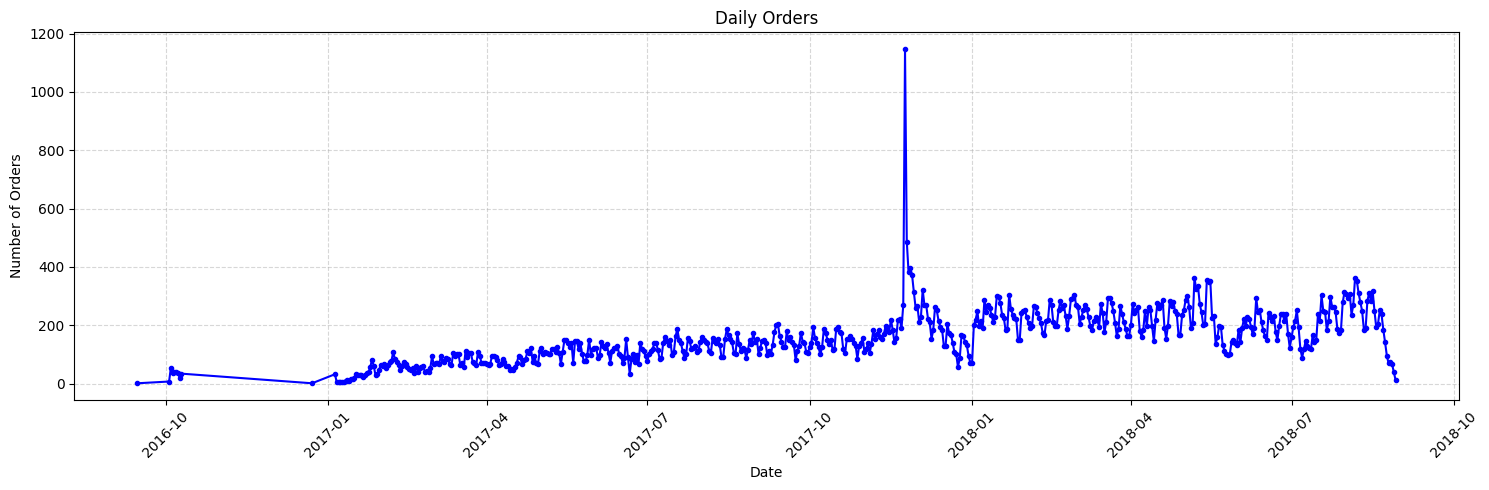

In [121]:
# Matplotlib Line Chart
plt.figure(figsize=(15, 5))
plt.plot(daily_orders, marker='.', linestyle='-', color='b')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.title("Daily Orders")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Periode transaksi tertinggi ada di periode 24-28 November 2017, dengan transaksi terbanyak di tanggal 24 mencapai 1147 transaksi.

### Pertanyaan 2: Produk apa yang paling laris?

In [122]:
most_ordered_items

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
dtype: int64

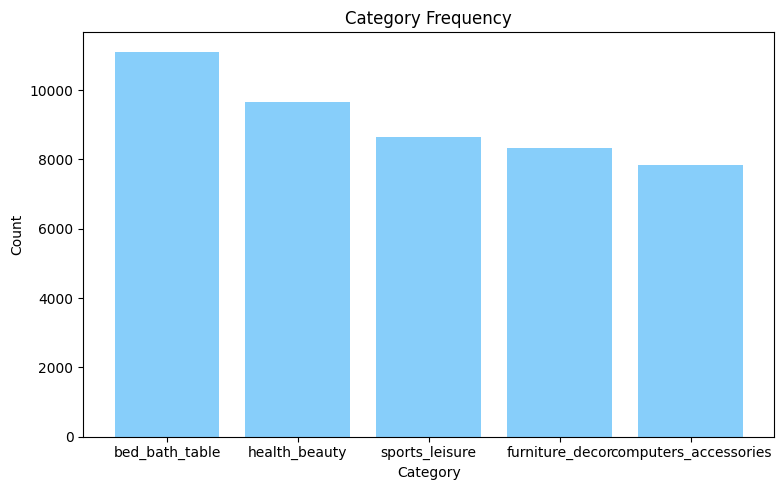

In [123]:
# Matplotlib Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(most_ordered_items.index, most_ordered_items, color='lightskyblue')
plt.title('Category Frequency')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Produk terlaris adalah bed_bath_table

### Pertanyaan 3: Berapa batas wajar freight value terhadap price?

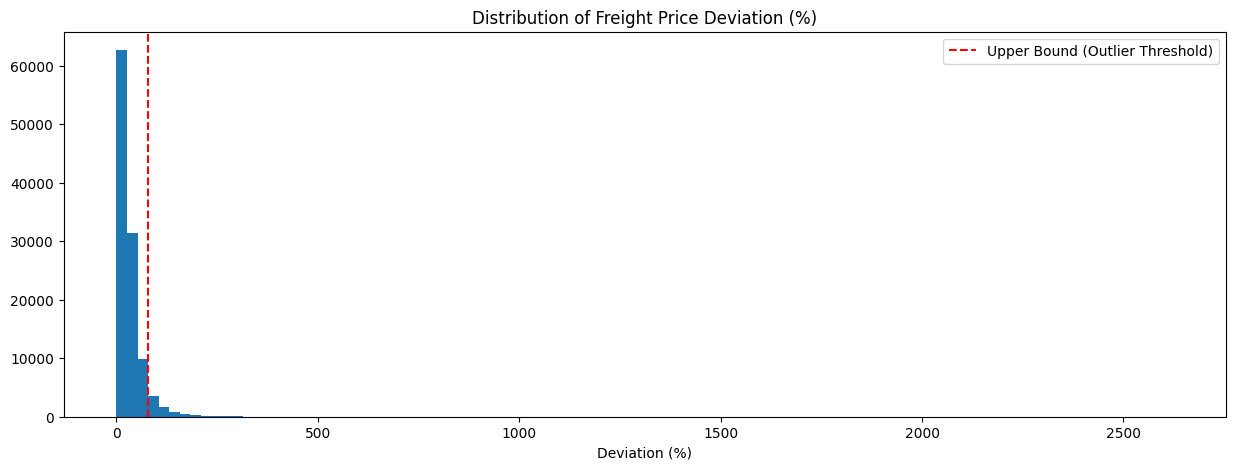

In [124]:
# sns.histplot(freight_analysis['persentege_freight'], bins=100, kde=True)
plt.figure(figsize=(15, 5))
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound (Outlier Threshold)')
plt.hist(order_items_df['freight_percentage'], bins=100)

plt.title('Distribution of Freight Price Deviation (%)')
plt.xlabel('Deviation (%)')

plt.legend()
plt.show()


In [125]:
print(f'Batas wajar nilai freight: {upper_bound:.0f}%\nTerdapat {len(freight_outliers)} data freight atau {freight_outliers_percentage:.2f}% dari keseluruhan data yang bernilai lebih besar dari batas wajar.')

Batas wajar nilai freight: 78%
Terdapat 7227 data freight atau 6.51% dari keseluruhan data yang bernilai lebih besar dari batas wajar.


### Pertanyaan 4: Dimana paling banyak customer berasal?

In [126]:
# top 5 cities
top_5_city = top_cities.head()
top_5_city


customer_city
sao paulo         15045
rio de janeiro     6601
belo horizonte     2697
brasilia           2071
curitiba           1489
dtype: int64

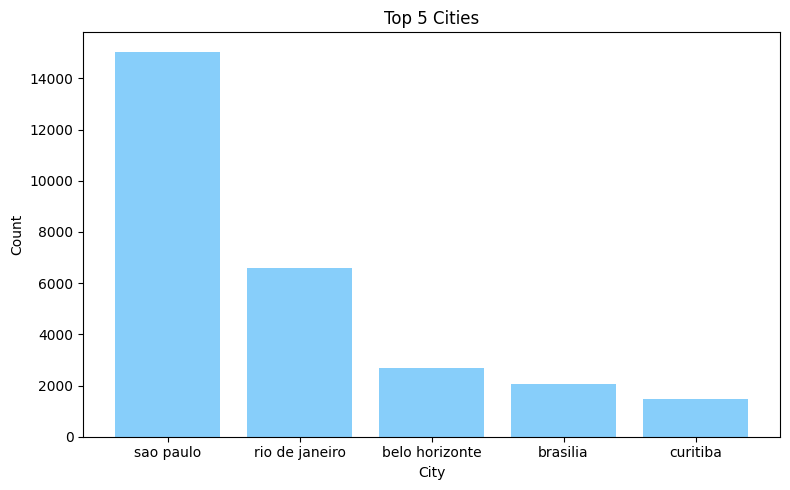

In [127]:
plt.figure(figsize=(8, 5))
plt.bar(top_5_city.index, top_5_city, color='lightskyblue')
plt.title('Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


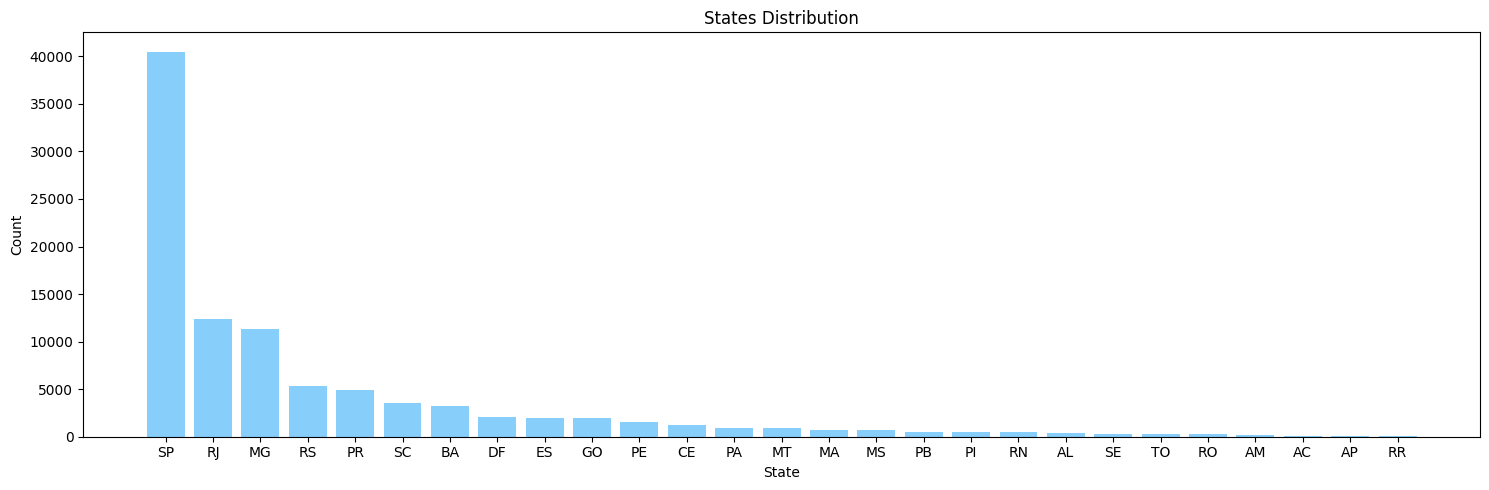

In [128]:
# states distribution
plt.figure(figsize=(15, 5))
plt.bar(top_states.index, top_states, color='lightskyblue')
plt.title('States Distribution')
plt.xlabel('State')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Conclusion

- Data yang kita miliki menampilkan transaksi mulai dari 15-09-2016 sampai 29-08-2018. Dimana transaksi terbanyak terjadi di periode 24-28 November 2017. Puncak transaksi mencapai 1147 di tanggal 24 November 2017. Dapat disimpulkan promo atau kampanye di periode tersebut sukses.
- Kategori produk terlaris adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor dan computers_accessories. Dengan bed_bath_table tertinggi mencapai 11115 transaksi.
- Batas wajar nilai freight adalah 78%. Dari keseluruhan data, ada 7227 transaksi yang memiliki nilai freight jauh diatas itu, bahkan mencapai 200% lebih. Dengan begitu perlu dilakukan analisa mendalam lebih lanjut.
- Kebanyakan customer berasal dari negara bagian SP, utamanya di kota sao paolo. Kampanye dan promosi dapat diberikan untuk mengoptimalkan transaksi disini.